In [1]:
from sketch import *
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = np.load("../data/Caltech101_medium.npy")

## Find good window size

recall_accuracy[sketch_method]:  symmetric [0.24999999999999994, 0.36, 0.37999999999999995, 0.35500000000000004, 0.39499999999999996, 0.45499999999999996, 0.37]
recall_accuracy[sketch_method]:  asymmetric [0.28, 0.49499999999999994, 0.485, 0.4749999999999998, 0.45999999999999996, 0.5299999999999999, 0.37]


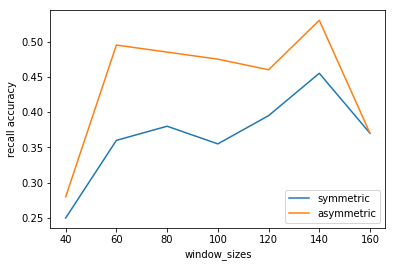

In [13]:
window_sizes = [40,60,80,100,120,140,160]
sketch_methods = ['symmetric', 'asymmetric']
query_points = data[:20,:]

recall_accuracy = {}
for sketch_method in sketch_methods:
    recall_accuracy[sketch_method] = []
    
for window_size in window_sizes:
    neigh = SketchKNN(n_neighbors=10, sketch_size = 40, strip_window = window_size, 
                      candidates_scale = 10)
    neigh.fit(data)
    trueIndex = neigh.kneighbors(query_points)
    for sketch_method in sketch_methods:
        accuracies = []
        result = neigh.kneighbors(query_points, sketch_method = sketch_method)
        for a,b in zip(result,trueIndex):
            matches = [1 if elma==elmb else 0 for elma, elmb in zip(a, b)]
            accuracies.append(sum(matches)/len(matches))
        recall_accuracy[sketch_method].append(sum(accuracies)/len(accuracies))

for sketch_method in sketch_methods:
    print("recall_accuracy[sketch_method]: ",sketch_method,recall_accuracy[sketch_method])
    plt.plot(window_sizes, recall_accuracy[sketch_method], label = sketch_method)
        
# naming the x axis 
plt.xlabel('window_sizes') 
# naming the y axis 
plt.ylabel('recall accuracy')   
# show a legend on the plot 
plt.legend()   
# function to show the plot 
plt.show() 

We choose 100 as window size.

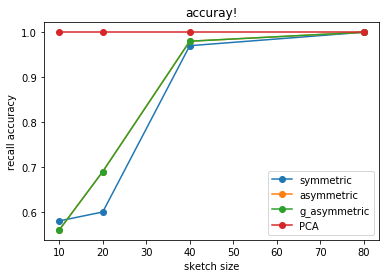

In [14]:
sketch_sizes = [10,20,40,80];
n_neighbors = 100
print_result = False
resultAccuracy1, resultAccuracy2, resultAccuracy3, resultAccuracy4 = ([] for i in range(4))
top = 0;
end = len(sketch_sizes)
for sketch_size in sketch_sizes: 
    neigh = SketchKNN(n_neighbors=n_neighbors, sketch_size = sketch_size, strip_window = 100, 
                      candidates_scale = 20)
    neigh.fit(data)
    query_points = data[:1,:]
    trueIndex = neigh.kneighbors(query_points)
    trueIndex = trueIndex.tolist();
    if print_result:
        print("true Index: ",trueIndex)
    result1 = neigh.kneighbors(query_points,sketch_method = 'symmetric')
    result2 = neigh.kneighbors(query_points,sketch_method = 'asymmetric')
    result3 = neigh.kneighbors(query_points,sketch_method = 'g_asymmetric')
    result4 = neigh.kneighbors(query_points,sketch_method = 'PCA')
    if print_result:
        print('symmetric:',result1)
        print('asymmetric:',result2)
        print('g_asymmetric:',result3)
        print('PCA:',result4)
    for re_list in result1:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy1.append(top/n_neighbors)
        
    for re_list in result2:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy2.append(top/n_neighbors)
    
    for re_list in result3:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy3.append(top/n_neighbors)
    
    for re_list in result4:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy4.append(top/n_neighbors)

y1 = resultAccuracy1 

# line 1 points 
x1 = sketch_sizes 
# plotting the line 1 points  
plt.plot(x1, y1, marker='o',label = "symmetric") 

         
y2 = resultAccuracy2  
# line 2 points 
x2 = sketch_sizes 
# plotting the line 2 points  
plt.plot(x2, y2, marker='o',label = "asymmetric") 
         
y3 = resultAccuracy3  
# line 2 points 
x3 = sketch_sizes
# plotting the line 2 points  
plt.plot(x3, y3, marker='o',label = "g_asymmetric")
         
y4 = resultAccuracy4  
# line 2 points 
x4 = sketch_sizes
# plotting the line 2 points  
plt.plot(x4, y4, label = "PCA",marker='o')
  
# naming the x axis 
plt.xlabel('sketch size') 
# naming the y axis 
plt.ylabel('recall accuracy') 
# giving a title to my graph 
plt.title('accuray!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [ ]:
import time
domain1 = [10,50,100];
resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y1 = resultRunningTime  



# line 1 points
x1 = domain1

# plotting the line 1 points  
plt.plot(x1, y1, label = "line 1") 


resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y2 = resultRunningTime  

# line 2 points 
x2 = domain1 
# plotting the line 2 points  
plt.plot(x2, y2, label = "line 2") 


resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y3 = resultRunningTime  

# line 2 points 
x3 = domain1

# plotting the line 2 points  
plt.plot(x3, y3, label = "line 3")



resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y4 = resultRunningTime  

# line 2 points 
x4 = domain1
# plotting the line 2 points  
plt.plot(x4, y4, label = "line 4")
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('runnung time!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 
